### Q5: Join, Merge and Data visualization on States_data_set

In [2]:
#import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import matplotlib as mlt

In [3]:
#get & set working directory
os.getcwd()

'/home/sa05975666/06-08-2018/D01_Q3'

In [3]:
# read the data files
df1 = pd.read_excel("/home/sa05975666/06-08-2018/D01_Q5/Q5_01_State abbervs.xlsx")
df2 = pd.read_excel("/home/sa05975666/06-08-2018/D01_Q5/Q5_2_State areas.xlsx")
df3 = pd.read_excel("/home/sa05975666/06-08-2018/D01_Q5/Q5_state_population.xlsx")

In [7]:
print(df3.columns)
print(df2.columns)
print(df1.columns)

Index(['state/region', 'ages', 'year', 'population'], dtype='object')
Index(['state', 'area (sq. mi)'], dtype='object')
Index(['state', 'abbreviation'], dtype='object')


In [18]:
df3.rename(columns = {'state/region':'state_code'}, inplace = True)
df1.rename(columns = {'abbreviation':'state_code'}, inplace = True)

In [20]:
df4 = pd.merge(df1, df3, how = 'left', on = 'state_code')

In [22]:
master_df = pd.merge(df4, df2, how = 'left', on = 'state')

In [24]:
master_df.isnull().any()

state            False
state_code       False
ages             False
year             False
population       False
area (sq. mi)    False
dtype: bool

### Which State has Highest Population

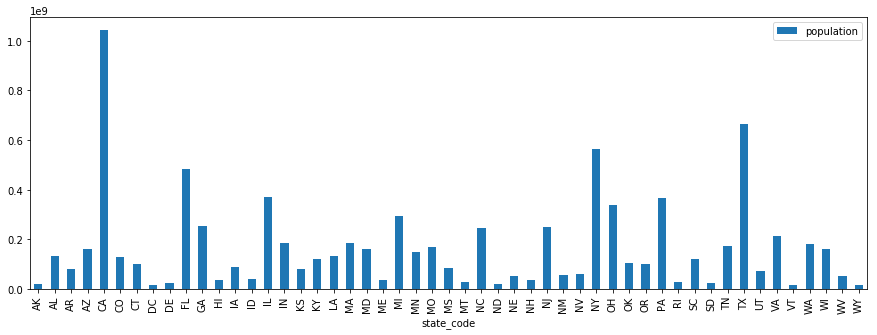

In [42]:
master_df.groupby(['state_code'], as_index = True)[['population']].sum().plot.bar(figsize=(15,5))

### How is the population changing yearly

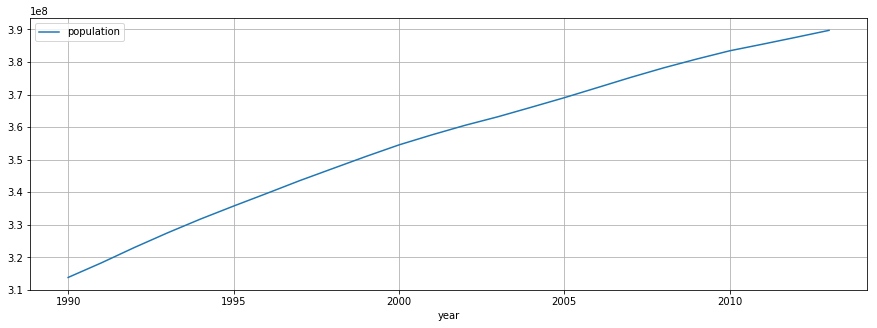

In [33]:
master_df.groupby(['year'], as_index = True)[['population']].sum().plot(figsize=(15,5), 
                                                             grid=True)

### What is the population of under 18 teens comapred to Total

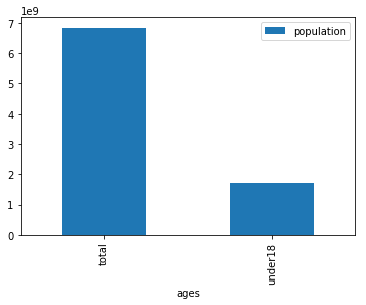

In [37]:
master_df.groupby(['ages'], as_index = True)[['population']].sum().plot.bar()

### which State is Largest in terms of Area

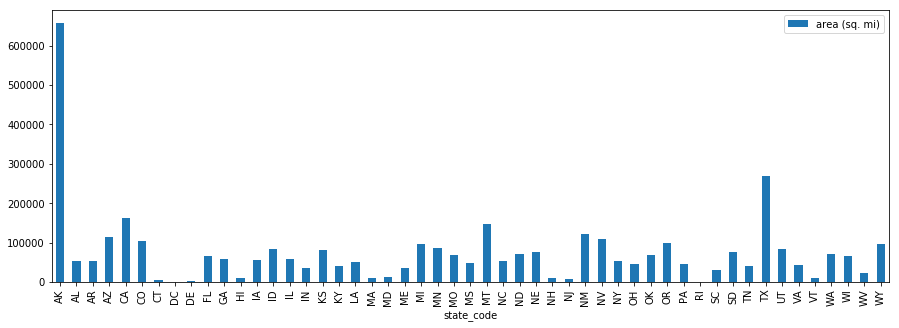

In [56]:
ap = master_df.groupby(['state_code'], as_index = True)[['area (sq. mi)']].mean().plot.bar(figsize=(15,5))
#plt.xticks(range(0, x_max + 1), tick_labels, rotation=45) 